   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0    0  ...      0      0   
1      2    0    0    0    0    0    0    0    0    0  ...      0      0   
2      1    0    0    0    0    0    0    0    0    0  ...      0      0   
3      0    0    0    0    0    0    0    0    0    0  ...      0      0   
4      4    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


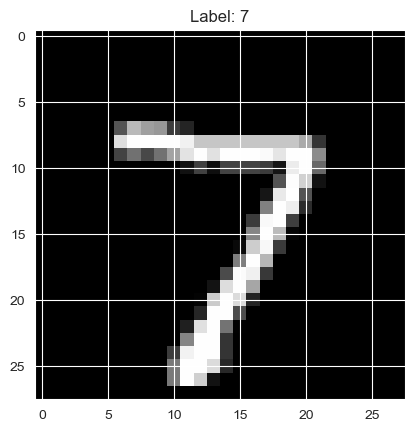

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import prewitt

# Завантаження даних MNIST у CSV форматі
file_path = "mnist_test.csv"  # Вкажіть правильний шлях до файлу
mnist_data = pd.read_csv(file_path)

# Перевірка структури
print(mnist_data.head())

# Візуалізація першого зображення
image_data = mnist_data.iloc[0, 1:].values.reshape(28, 28)  # Пропускаємо перший стовпець (мітка)
plt.imshow(image_data, cmap="gray")
plt.title(f"Label: {mnist_data.iloc[0, 0]}")
plt.show()

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import prewitt

# 1️⃣ Вибір зображення (замініть шлях на власний)
image_path = "image.jpg"  # Вкажіть шлях до вашого зображення
image = cv2.imread(image_path)

# Перевірка розмірності
height, width, channels = image.shape
print(f"Розмірність: {height}x{width}, Канали: {channels}")

# Візуалізація оригінального зображення
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Оригінальне зображення")

# 2️⃣ Попередня обробка (Перетворення в градації сірого, якщо потрібно)
if channels == 3:  # Якщо зображення кольорове
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    gray_image = image

plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Градації сірого")

# 3️⃣ Вилучення ознак
# 3.1 Піксельні значення як ознаки
pixel_features = gray_image.flatten()
print(f"Кількість піксельних ознак: {len(pixel_features)}")

# 3.2 Усереднення каналів (для кольорових зображень)
if channels == 3:
    mean_channels = np.mean(image, axis=2)  # Усереднення R, G, B
    plt.subplot(1, 3, 3)
    plt.imshow(mean_channels, cmap='gray')
    plt.title("Усереднені канали")

# 3.3 Контури (Prewitt)
prewitt_x = prewitt(gray_image, axis=0)
prewitt_y = prewitt(gray_image, axis=1)
edges = np.hypot(prewitt_x, prewitt_y)  # Комбінування контурів у X та Y

plt.figure()
plt.imshow(edges, cmap='gray')
plt.title("Контури (Prewitt)")

# Відображення всіх графіків
plt.show()

# 4️⃣ Аналіз результатів
print("Методи вилучення ознак:")
print(f"- Піксельні значення: {len(pixel_features)} ознак")
if channels == 3:
    print(f"- Усереднення каналів: {mean_channels.shape}")
print(f"- Контури: {edges.shape}")



AttributeError: 'NoneType' object has no attribute 'shape'

(10000, 785)
Кількість піксельних ознак: 784


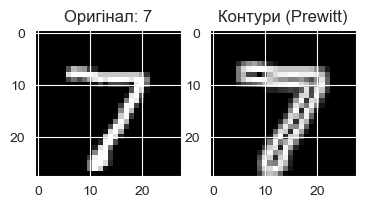

Методи вилучення ознак:
- Піксельні значення: 784 ознак
- Усереднене значення пікселів: 0.09231
- Контури (Prewitt) обчислено


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import prewitt

# 1️⃣ Завантаження даних (замініть шлях, якщо потрібно)
mnist_data = pd.read_csv("mnist_test.csv")  # Файл із Kaggle
print(mnist_data.shape)  # (60000, 785) -> 784 пікселів + мітка класу

# Вибір випадкового зображення
sample = mnist_data.iloc[0].values  # Візьмемо перший рядок

# Відокремлення мітки класу (цифра)
label = sample[0]
image = sample[1:].reshape(28, 28)  # Перетворення у формат 28x28

# Візуалізація оригінального зображення
plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title(f"Оригінал: {label}")

# 2️⃣ Попередня обробка (нормалізація)
image = image / 255.0  # Нормалізація (0–1)

# 3️⃣ Вилучення ознак
# 3.1 Піксельні значення
pixel_features = image.flatten()
print(f"Кількість піксельних ознак: {len(pixel_features)}")

# 3.2 Усереднення каналів (для MNIST не потрібно, бо це ч/б)
mean_channels = np.mean(image)

# 3.3 Контури (Prewitt)
prewitt_x = prewitt(image, axis=0)
prewitt_y = prewitt(image, axis=1)
edges = np.hypot(prewitt_x, prewitt_y)  # Комбіновані контури

# Візуалізація контурів
plt.subplot(1, 3, 2)
plt.imshow(edges, cmap="gray")
plt.title("Контури (Prewitt)")

# Відображення всіх графіків
plt.show()

# 4️⃣ Аналіз вилучених ознак
print("Методи вилучення ознак:")
print(f"- Піксельні значення: {len(pixel_features)} ознак")
print(f"- Усереднене значення пікселів: {mean_channels:.5f}")
print(f"- Контури (Prewitt) обчислено")



Форма даних: (10000, 785)
Обране зображення: Цифра 2
Розмірність: (28, 28), Кольоровість: Ч/Б, Складність: 81 унікальних значень
Кількість піксельних ознак: 784
Середнє значення яскравості: 0.18202

Порівняння методів:
- Піксельні значення: 784 ознак (дуже детально)
- Середнє значення пікселів: 0.18202 (дуже узагальнено)
- Контури (Prewitt) дають мінімальний обсяг, але виділяють структуру


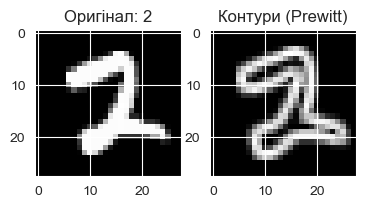


📊 Висновки:
- Піксельні значення зберігають максимум інформації, але мають велику розмірність.
- Контури дозволяють визначати форми та ключові особливості цифр.
- Усереднення яскравості дає занадто узагальнену інформацію для класифікації.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import prewitt

# 1️⃣ Вибір зображення для аналізу
mnist_data = pd.read_csv("mnist_test.csv")  # Завантаження даних
print(f"Форма даних: {mnist_data.shape}")  # Очікується (60000, 785)

# Вибір випадкового зображення
sample_index = np.random.randint(0, len(mnist_data))  # Випадковий рядок
sample = mnist_data.iloc[sample_index].values

# Відокремлення мітки класу
label = sample[0]
image = sample[1:].reshape(28, 28)  # Перетворення у формат 28x28

print(f"Обране зображення: Цифра {label}")
print(f"Розмірність: {image.shape}, Кольоровість: Ч/Б, Складність: {np.unique(image).size} унікальних значень")

# Візуалізація оригінального зображення
plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title(f"Оригінал: {label}")

# 2️⃣ Попередня обробка зображення
image = image / 255.0  # Нормалізація до [0,1]

# 3️⃣ Вилучення ознак
# 3.1 Піксельні значення
pixel_features = image.flatten()
print(f"Кількість піксельних ознак: {len(pixel_features)}")

# 3.2 Усереднення каналів (для MNIST не потрібно, бо це ч/б)
mean_channels = np.mean(image)
print(f"Середнє значення яскравості: {mean_channels:.5f}")

# 3.3 Контури (Prewitt)
prewitt_x = prewitt(image, axis=0)
prewitt_y = prewitt(image, axis=1)
edges = np.hypot(prewitt_x, prewitt_y)  # Комбіновані контури

# Візуалізація контурів
plt.subplot(1, 3, 2)
plt.imshow(edges, cmap="gray")
plt.title("Контури (Prewitt)")

# 4️⃣ Аналіз методів
print("\nПорівняння методів:")
print(f"- Піксельні значення: {len(pixel_features)} ознак (дуже детально)")
print(f"- Середнє значення пікселів: {mean_channels:.5f} (дуже узагальнено)")
print("- Контури (Prewitt) дають мінімальний обсяг, але виділяють структуру")

# 5️⃣ Аналіз результатів
plt.show()

print("\n📊 Висновки:")
print("- Піксельні значення зберігають максимум інформації, але мають велику розмірність.")
print("- Контури дозволяють визначати форми та ключові особливості цифр.")
print("- Усереднення яскравості дає занадто узагальнену інформацію для класифікації.")

